<a href="https://colab.research.google.com/github/JulianDR26/Se-ales-y-Sistemas-2024-1S/blob/main/PARCIAL_1_SE%C3%91ALES_Y_SISTEMAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EXAMEN 1: SEÑALES Y SISTEMAS SOLUCION

In [2]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

 # A) DISTANCIA MEDIA ENTRE DOS SEÑALES PERIODICAS

La explicación y el procedimiento matematico del ejercicio se encuentra en el pdf adjunto, cabe resaltar que el codigo de la solución se encuentra debiadamente **comentado**

In [18]:
import sympy as sp

# Definición de las variables
t, A, B, w0 = sp.symbols('t A B w0', real=True)
T = sp.Symbol('T', positive=True, real=True)

# Definición de las señales
x1 = A * sp.exp(sp.I * w0 * t)
x2 = B * sp.exp(sp.I * 5 * w0 * t)

# Diferencia entre las señales
diferencia = x1 - x2

# Potencia media de la diferencia
diferencia_squrt = sp.simplify(sp.Abs(diferencia)**2)

# Integral de la potencia media de la diferencia
integral = sp.integrate(diferencia_squrt, (t, 0, T))

# Promedio en el intervalo T
Pot_media = integral / T

# Limite cuando T tiende a infinito
distancia_cuadrado = sp.limit(Pot_media, T, sp.oo)
distancia = sp.sqrt(distancia_cuadrado)

# Mostrar resultados
print("Potencia media de la diferencia:", distance_squared)
print("Distancia entre las señales:", distance)

Potencia media de la diferencia: A**2 - 2*A*B + B**2
Distancia entre las señales: sqrt(A**2 - 2*A*B + B**2)


# B) DISCRETIZANDO SEÑAL CONTINUA Y RECTIFICAR SI LA FRECUENCIA ES O NO APROPIADA, SI NO SE IMPLEMENTA UN CONVERSOR ADECUADO A LA SEÑAL

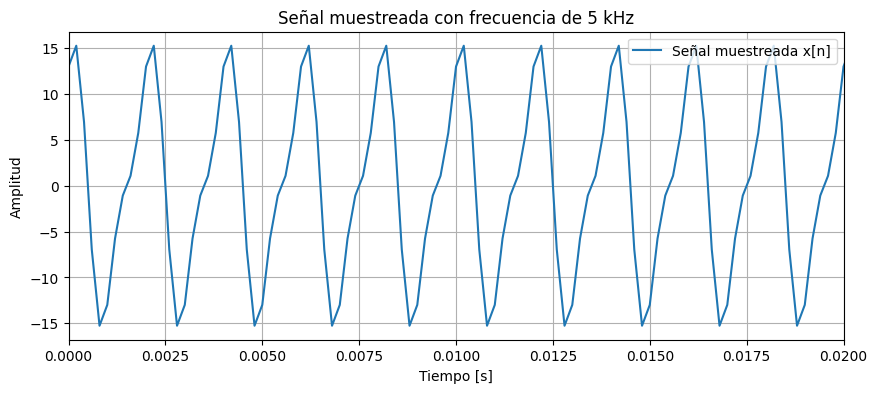

In [9]:
#===================================================================
# EN ESTA PRIMERA PARTE SE DISCRETIZA Y CUANTIZA LA SEÑAL CONTINUA
# REVISANDO QUE SEA APROPIADA O NO
#====================================================================


# Definir los parámetros de la señal continua
fs = 5000  # Frecuencia de muestreo 5kHz
t = np.arange(0, 1, 1/fs)  # Tiempo en segundos

# Definir la señal continua x(t)
x_t = 3 * np.cos(1000 * np.pi * t) + 5 * np.sin(2000 * np.pi * t) + 10 * np.cos(11000 * np.pi * t)

# Graficar la señal continua
plt.figure(figsize=(10, 4))
plt.plot(t, x_t, label='Señal muestreada x[n]')
plt.title('Señal muestreada con frecuencia de 5 kHz')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.xlim(0, 0.02)
plt.grid(True)
plt.legend()
plt.show()

Frecuencias originales y aliased:
f1 original: 500 Hz, f1 alias: 500 Hz
f2 original: 1000 Hz, f2 alias: 1000 Hz
f3 original: 5500 Hz, f3 alias: 500 Hz


<ipython-input-20-3f91258320ff>:44: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(n, x_n, basefmt=" ", use_line_collection=True)


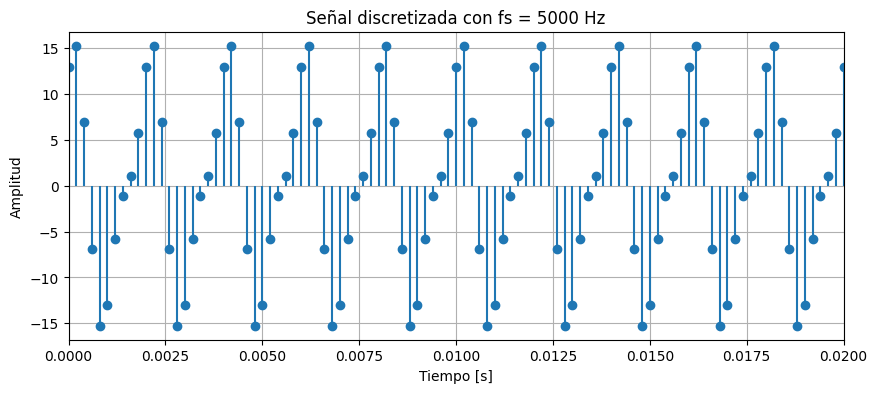

In [20]:
# Frecuencia de muestreo
fs = 5000  # 5 kHz
T = 1  # Duración de la señal (1 segundo)

# Tiempo discreto
n = np.arange(0, T, 1/fs)

# Frecuencias originales
f1 = 500
f2 = 1000
f3 = 5500

# Frecuencia de Nyquist
f_Nyquist = fs / 2

# Cálculo de las frecuencias aliased
# Verificación de aliasing
if f1 > f_Nyquist:
    f1_alias = abs(f1 - round(f1 / fs) * fs)
else:
    f1_alias = f1

if f2 > f_Nyquist:
    f2_alias = abs(f2 - round(f2 / fs) * fs)
else:
    f2_alias = f2

if f3 > f_Nyquist:
    f3_alias = abs(f3 - round(f3 / fs) * fs)
else:
    f3_alias = f3

print("Frecuencias originales y aliased:")
print(f"f1 original: {f1} Hz, f1 alias: {f1_alias} Hz")
print(f"f2 original: {f2} Hz, f2 alias: {f2_alias} Hz")
print(f"f3 original: {f3} Hz, f3 alias: {f3_alias} Hz")
# Generar la señal discretizada
x_n = 3 * np.cos(2 * np.pi * f1_alias * n) + \
      5 * np.sin(2 * np.pi * f2_alias * n) + \
      10 * np.cos(2 * np.pi * f3_alias * n)

# Graficar la señal discretizada
plt.figure(figsize=(10, 4))
plt.stem(n, x_n, basefmt=" ", use_line_collection=True)
plt.title(f'Señal discretizada con fs = {fs} Hz')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.xlim(0, 0.02)
plt.grid(True)
plt.show()

Esto es la grafica de la señal discretizada aun con la precencia del aliasing

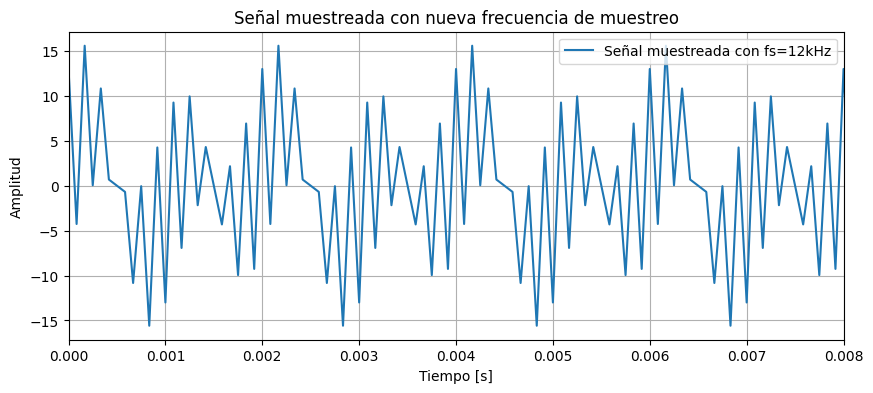

<ipython-input-42-59c938b0ac46>:24: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(n, x_n, basefmt=" ", use_line_collection=True)


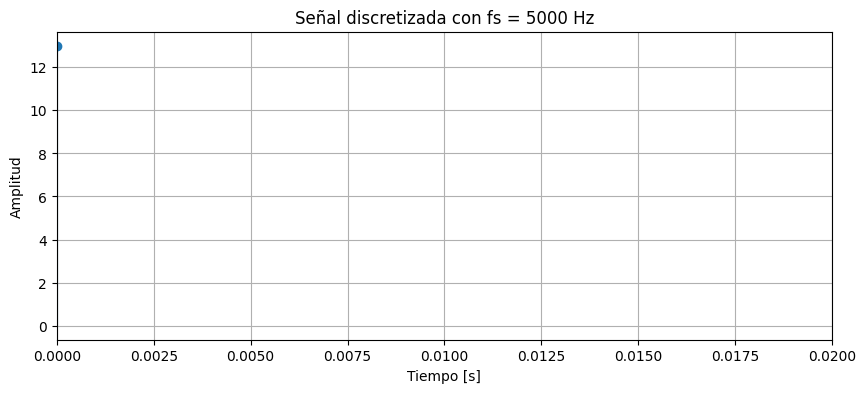

In [42]:

# Si hay aliasing, se debe aumentar la frecuencia de muestreo
fs_new = 12000  # Nueva frecuencia de muestreo (por ejemplo 12kHz)
t_new = np.arange(0, 1, 1/fs_new)
x_t_new = 3 * np.cos(1000 * np.pi * t_new) + 5 * np.sin(2000 * np.pi * t_new) + 10 * np.cos(11000 * np.pi * t_new)

# Graficar la señal muestreada con la nueva frecuencia de muestreo
plt.figure(figsize=(10, 4))
plt.plot(t_new, x_t_new, label='Señal muestreada con fs=12kHz')
plt.title('Señal muestreada con nueva frecuencia de muestreo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.xlim(0, 0.008)
plt.grid(True)
plt.legend()
plt.show()

# Generar la señal discretizada
x_n = 3 * np.cos(2 * np.pi * f1_alias * n) + \
      5 * np.sin(2 * np.pi * f2_alias * n) + \
      10 * np.cos(2 * np.pi * f3_alias * n)

# Graficar la señal discretizada
plt.figure(figsize=(10, 4))
plt.stem(n, x_n, basefmt=" ", use_line_collection=True)
plt.title(f'Señal discretizada con fs = {fs} Hz')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.xlim(0, 0.02)
plt.grid(True)
plt.show()

Frecuencias originales y aliased:
f1 original: 500 Hz, f1 alias: 500 Hz
f2 original: 1000 Hz, f2 alias: 1000 Hz
f3 original: 5500 Hz, f3 alias: 500 Hz


# C) SALIDA DEL SLIT CON RESPUESTA AL ESCALÓN DISCRETO

la convolución discreta para obtener la salida del sistema es:  [127.2        202.66666667 166.4        325.86666667 272.53333333
 225.6        171.2        160.53333333 161.6        195.73333333
 238.4        281.06666667 308.8        321.6        314.13333333
 286.4        266.13333333 245.86666667 229.86666667 225.6
 228.8        233.06666667 238.4        234.13333333 237.33333333
 240.53333333 248.         267.2        291.73333333 308.8
 315.2        298.13333333 272.53333333 234.13333333 190.4
 166.93333333 161.6        187.2        223.46666667 287.46666667
 325.86666667 360.         355.73333333 325.86666667 272.53333333
 225.6        171.2        160.53333333 161.6        195.73333333
 238.4        281.06666667 308.8        321.6        314.13333333
 286.4        266.13333333 245.86666667 229.86666667 225.6
 228.8        233.06666667 238.4        234.13333333 237.33333333
 240.53333333 248.         267.2        291.73333333 308.8
 315.2        298.13333333 272.53333333 234.133

<ipython-input-40-2d4c2a10d5a3>:53: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(n, x_t_discrete, use_line_collection=True, label="Señal discretizada y cuantizada $x[n]$")
<ipython-input-40-2d4c2a10d5a3>:62: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(np.arange(len(y_n)), y_n, use_line_collection=True, label="Respuesta del sistema $y[n]$")


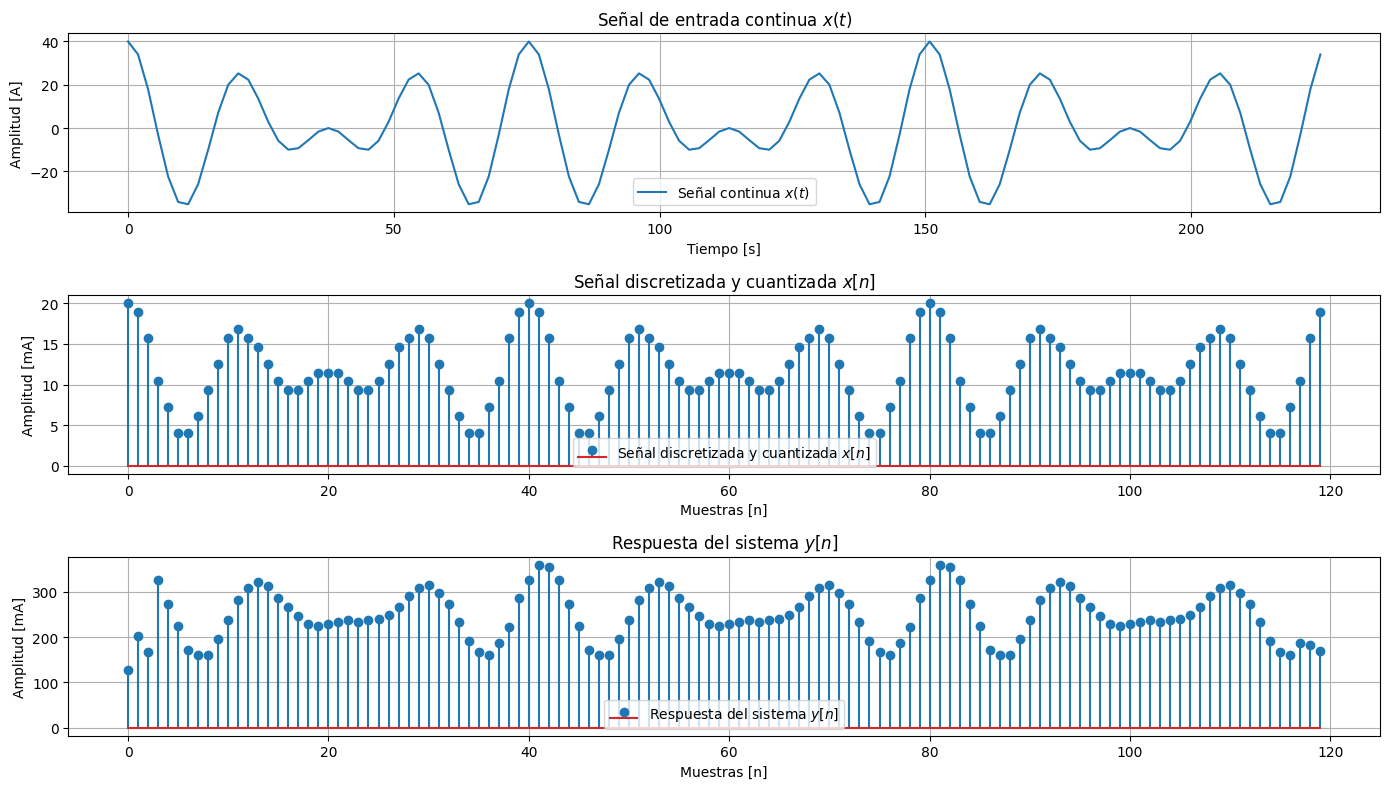

In [40]:
# Parámetros de la señal de entrada
A = 20  # Amplitud en Amperios
T1 = 6*np.pi #perido señal 1
T2 = 8*np.pi #perido señal 2
F1 = 1/T1
F2 = 1/T2
T = 24*np.pi #perido cuasiperiódica
Fs = 10*max(F1,F2) #frecuencia muestreo
t = np.arange(0,3*T,1/Fs) #vector de tiempo, se muestran 3 periodos

x_t = A * (np.cos(t / 3) + np.cos(t / 4))  # Señal de entrada continua

# Discretización
Ts = t[1] - t[0]  # Período de muestreo
n = np.arange(len(t))  # Índice discreto

# Cuantización
min_current = 4  # mA
max_current = 20  # mA
n_levels = 16  # Resolución de 4 bits

# Ajuste de la señal al rango de corriente
x_t_scaled = (x_t - np.min(x_t)) / (np.max(x_t) - np.min(x_t))  # Normalización
x_t_quantized = min_current + x_t_scaled * (max_current - min_current)  # Ajuste al rango de 4-20 mA

# Cuantización a 4 bits
quantization_step = (max_current - min_current) / (n_levels - 1)
x_t_discrete = np.round((x_t_quantized - min_current) / quantization_step)
x_t_discrete = x_t_discrete * quantization_step + min_current

# Respuesta al escalón del sistema (h[n])
h_n = np.array([2, 4, 1, 5, 0, 10])

# Convolución discreta para obtener la salida del sistema
y_n = np.convolve(x_t_discrete, h_n, mode='same') #respuesta del slit -> se asegura tamaños iguales con mode=same
print('la convolución discreta para obtener la salida del sistema es: ',y_n)


# Graficar resultados
plt.figure(figsize=(14, 8))

# Señal de entrada x(t)
plt.subplot(3, 1, 1)
plt.plot(t, x_t, label="Señal continua $x(t)$")
plt.title("Señal de entrada continua $x(t)$")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [A]")
plt.grid(True)
plt.legend()

# Señal cuantizada y discretizada
plt.subplot(3, 1, 2)
plt.stem(n, x_t_discrete, use_line_collection=True, label="Señal discretizada y cuantizada $x[n]$")
plt.title("Señal discretizada y cuantizada $x[n]$")
plt.xlabel("Muestras [n]")
plt.ylabel("Amplitud [mA]")
plt.grid(True)
plt.legend()

# Respuesta del sistema
plt.subplot(3, 1, 3)
plt.stem(np.arange(len(y_n)), y_n, use_line_collection=True, label="Respuesta del sistema $y[n]$")
plt.title("Respuesta del sistema $y[n]$")
plt.xlabel("Muestras [n]")
plt.ylabel("Amplitud [mA]")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()